In [1]:
from pprint import pprint as pp

import docx
import pandas as pd
import pyforest
import sweetviz as sv
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return "\n".join(fullText)

In [2]:
text = getText("Assignment 3 - Decision Trees.docx")
print(text)

COMP 4448: Data Science Tools II						          Assignment 3
Directions: Do this assignment in Jupyter Notebook and provide screenshots of code and output in this word document wherever required. You will upload this word document containing screenshots of code and answers as well as your Jupyter Notebook to Canvas. All assignments will be submitted and graded through canvas and grades will be transferred to the 2U platform. 
Goal: The goal of this assignment is to give you the opportunity to get acquainted with the modeling in scikit-learn using decision trees. 
Packages: Core packages you may need for this assignment include numpy, pandas, sklearn. Matplotlib.pyplot and/or seaborn.  
Question 1
For a presidential election, campaign organizers for both the Republican and Democrat parties are interested in identifying undecided voters who would consider voting for their party. The file BlueOrRed.csv (provided on canvas) contains data on a sample of voters with tracked variables includi

'For a presidential election, campaign organizers for both the Republican and '
 'Democrat parties are interested in identifying undecided voters who would '
 'consider voting for their party. The file BlueOrRed.csv (provided on canvas) '
 'contains data on a sample of voters with tracked variables including: '
 'whether or not they are undecided regarding their candidate preference, age, '
 'whether they own a home, gender, marital status, household size, income, '
 'years of education, and whether they attend church. For this dataset, you '
 'would use the Undecided variable as your output variable and the rest of the '
 'variables as your input variables. You want to predict whether a candidate '
 'is undecided(Undecided=1) or decided(Undecided=0). \n'
 'Upload the data into Python and check for missing data. If there is any '
 'missing data, drop the cases that have the missing data. \n'
 'Paste a screenshot of your code and output here showing the first 5 rows of '
 'your DataFrame and how you checked or handled the missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            10000 non-null  int64  
 1   HomeOwner      10000 non-null  int64  
 2   Female         10000 non-null  int64  
 3   Married        10000 non-null  int64  
 4   HouseholdSize  10000 non-null  int64  
 5   Income         10000 non-null  float64
 6   Education      10000 non-null  int64  
 7   Church         10000 non-null  int64  
 8   Undecided      10000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


None

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



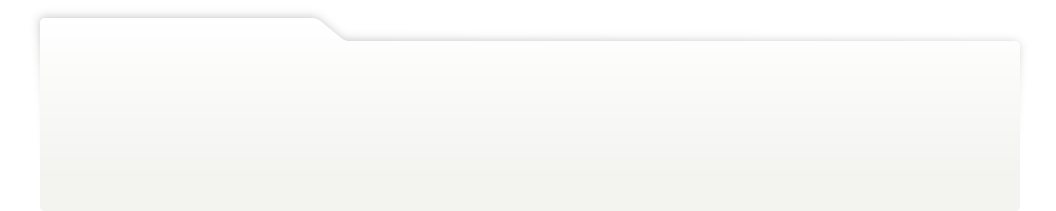
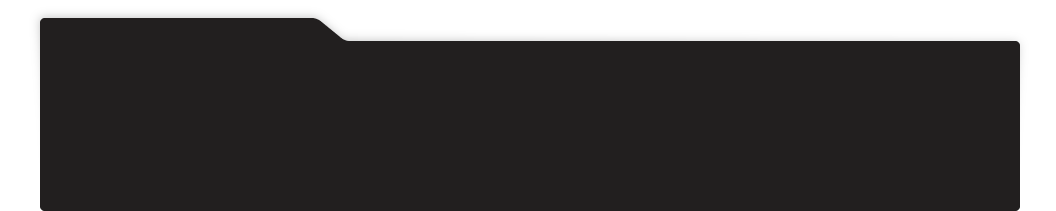
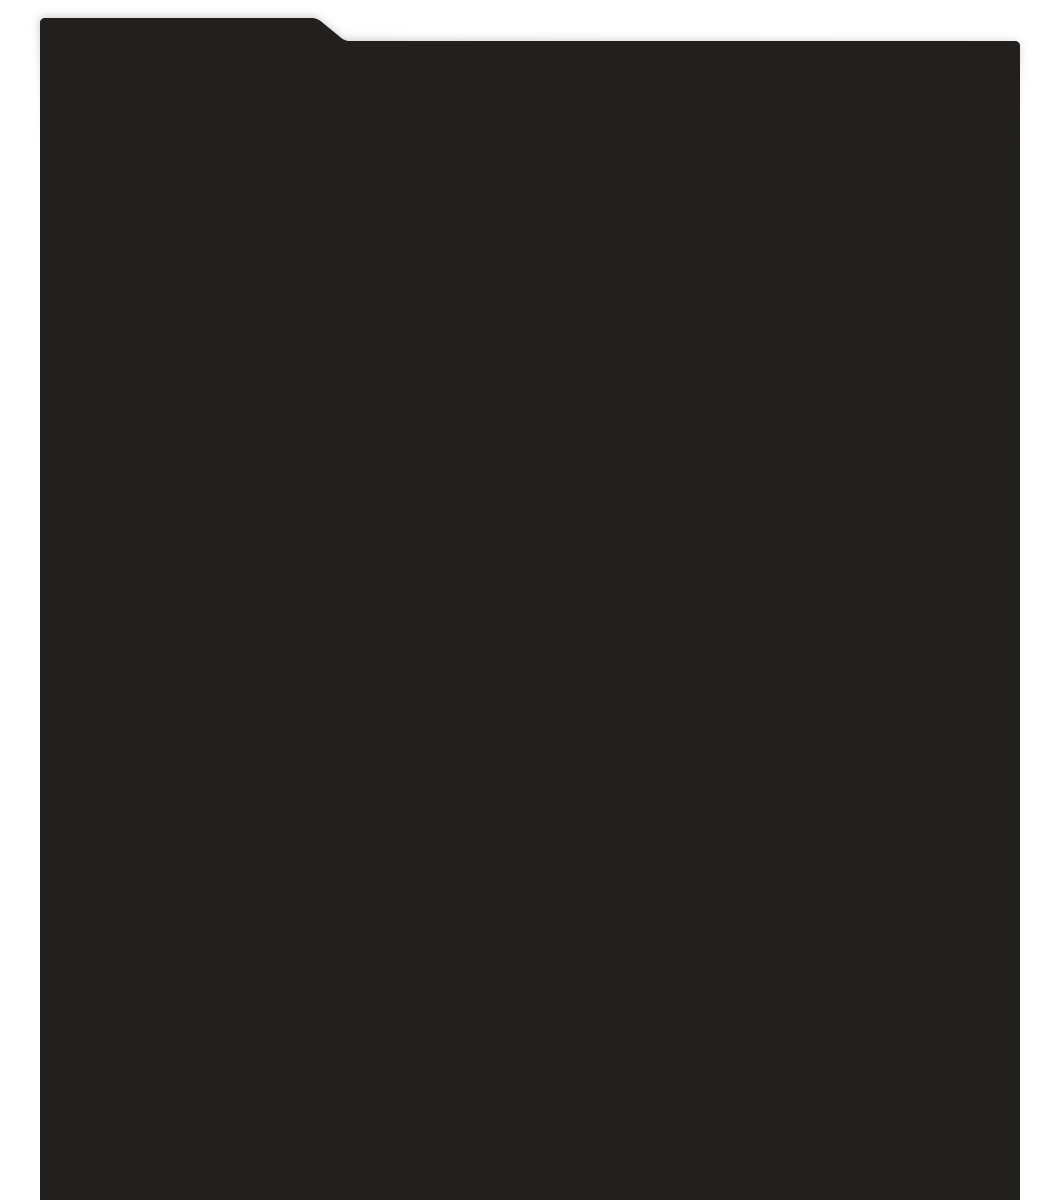
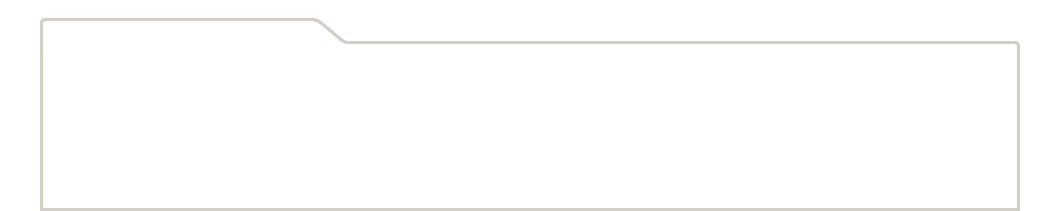
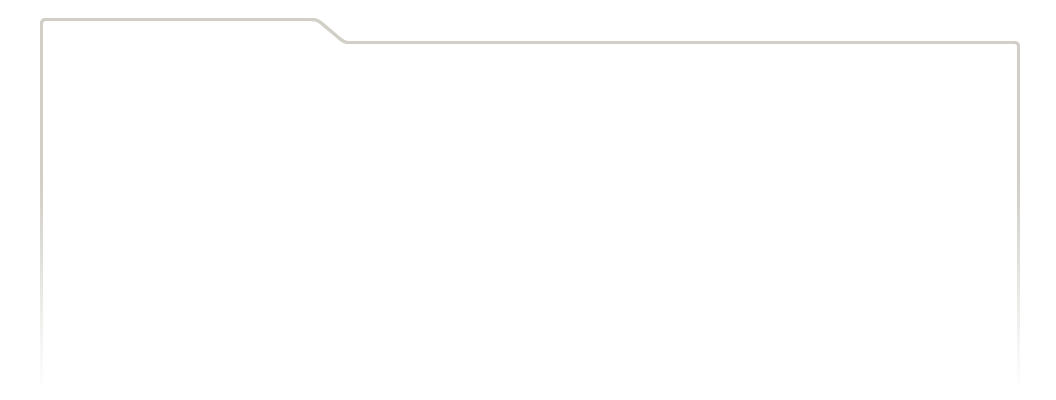
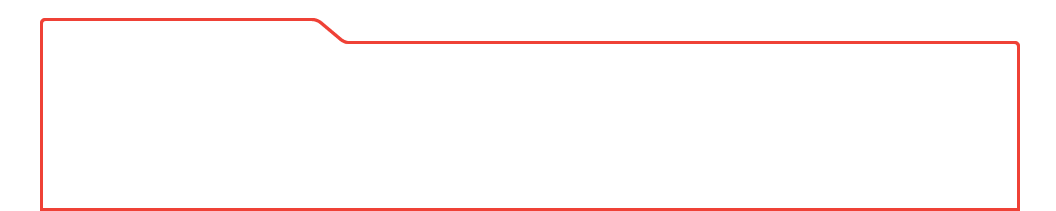
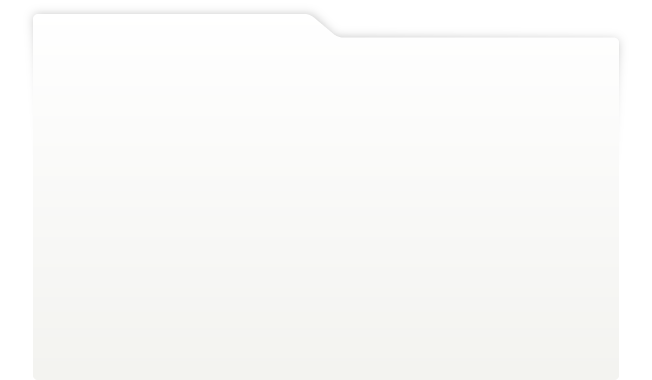
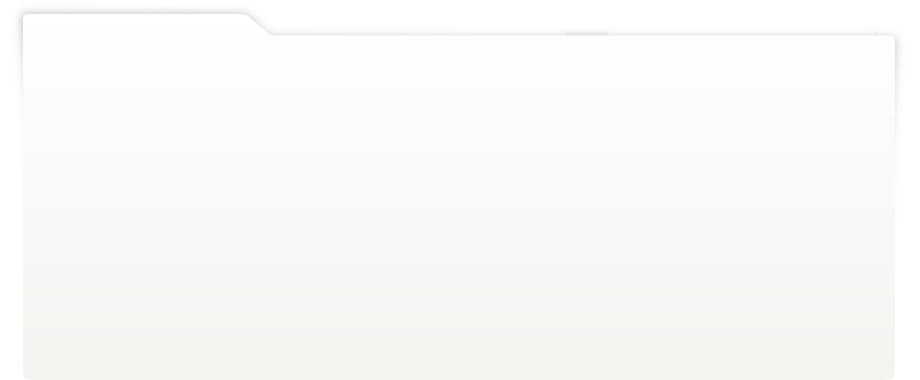
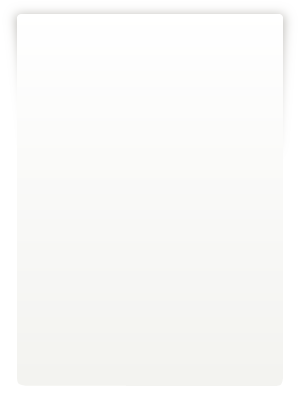
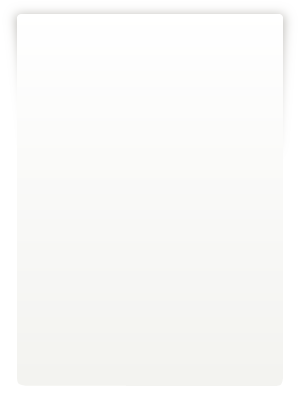
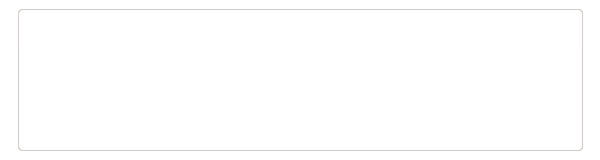
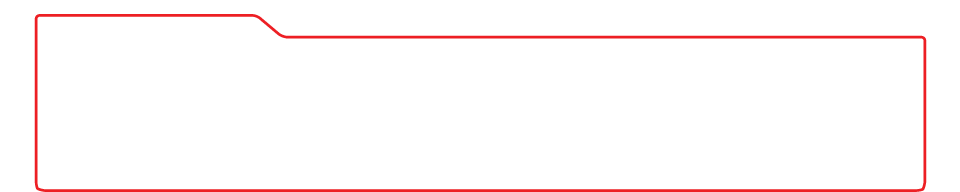
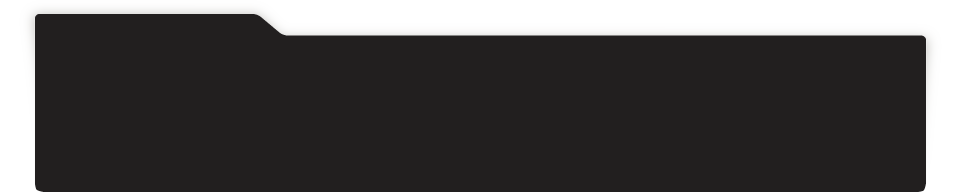
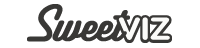
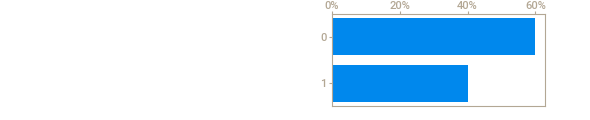
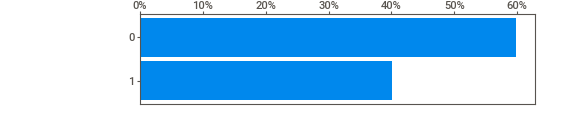
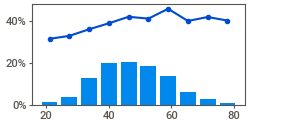
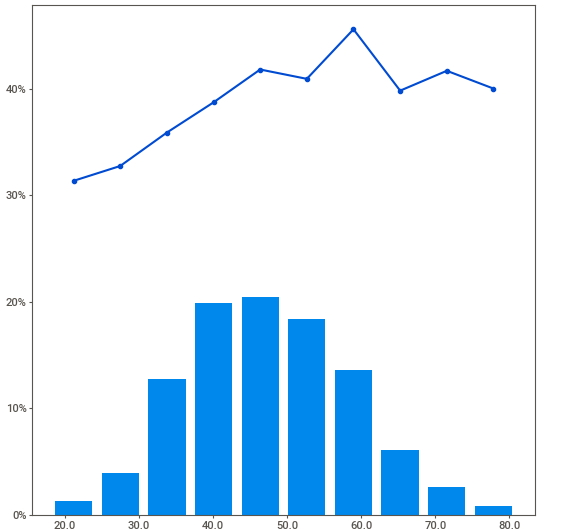
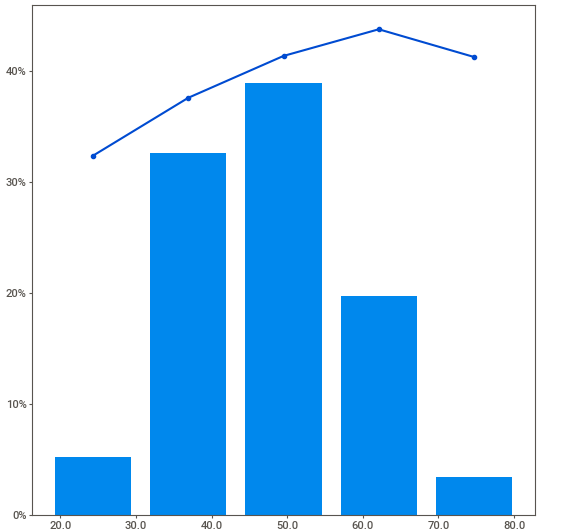
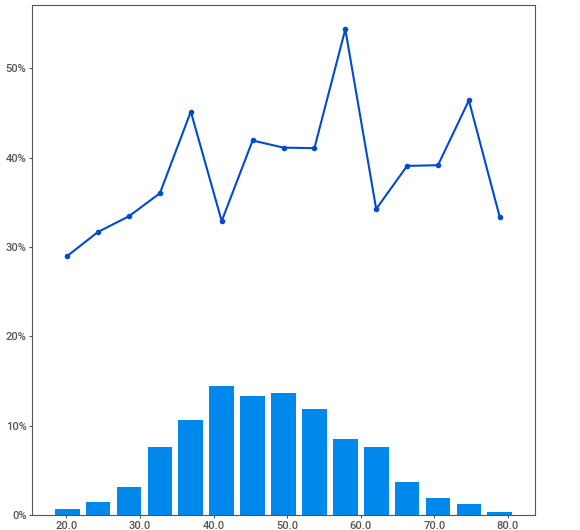
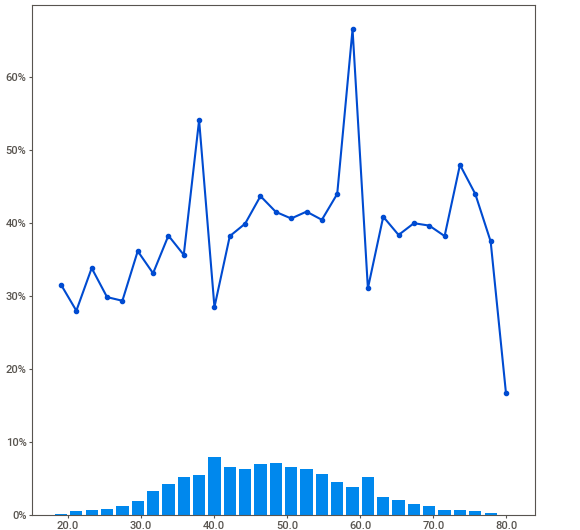
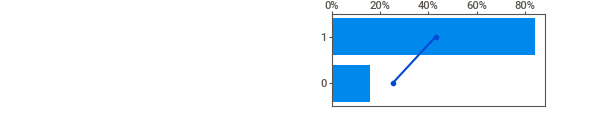
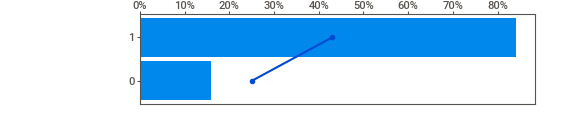
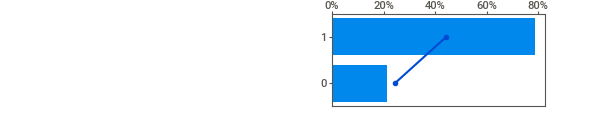
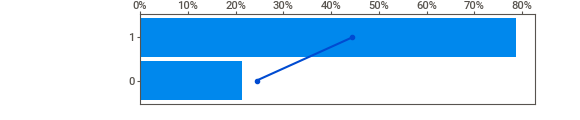
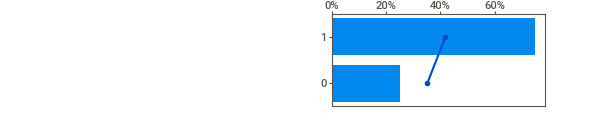
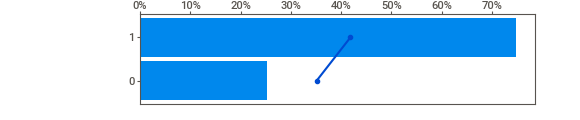
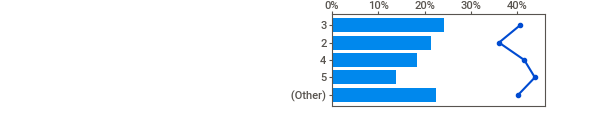
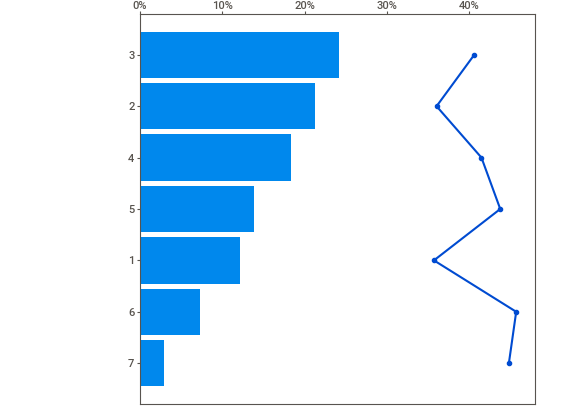
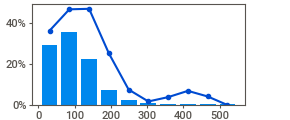
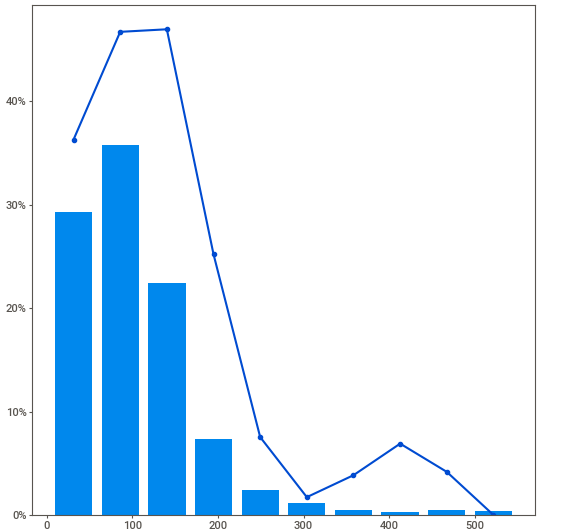
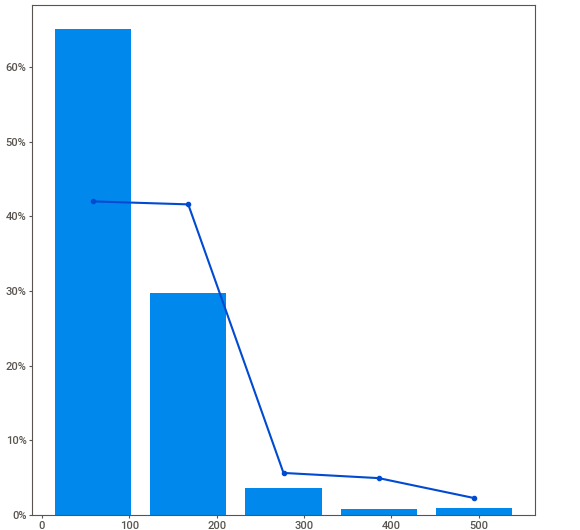
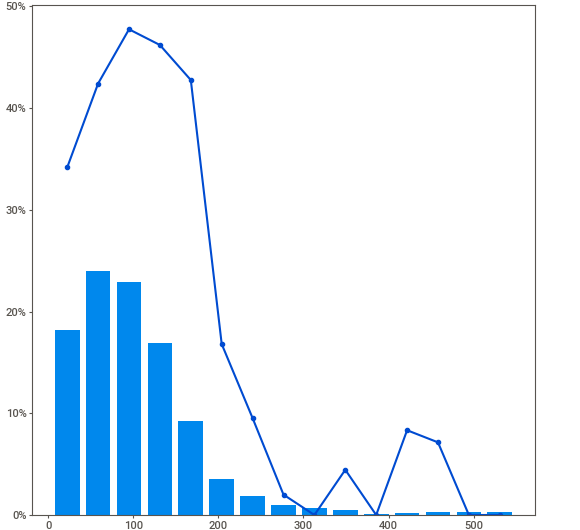
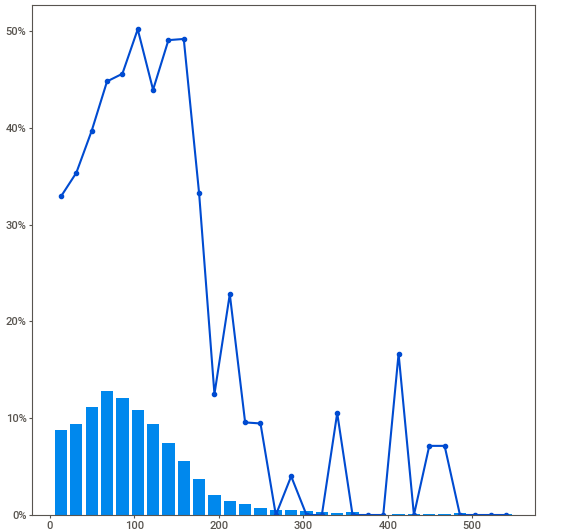
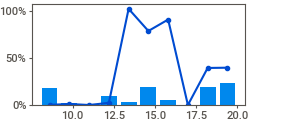
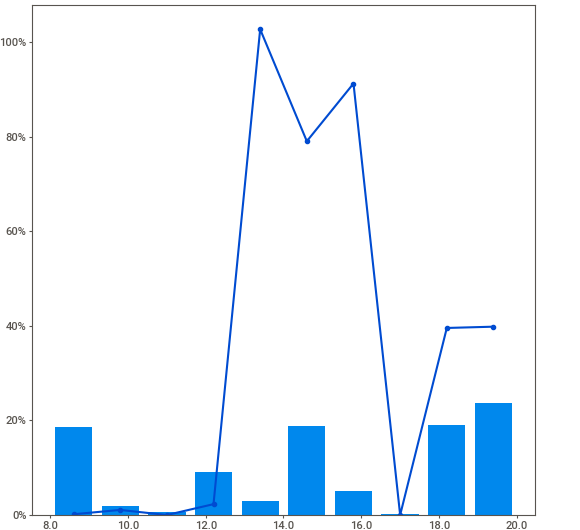
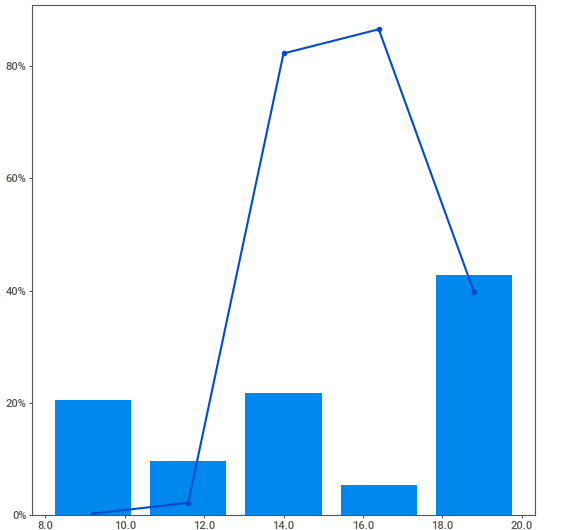
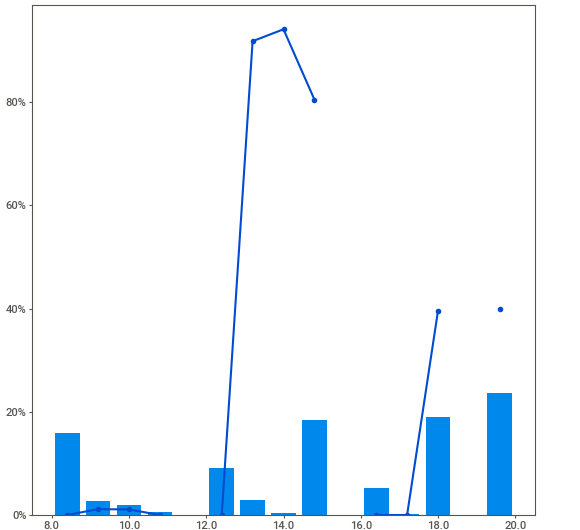
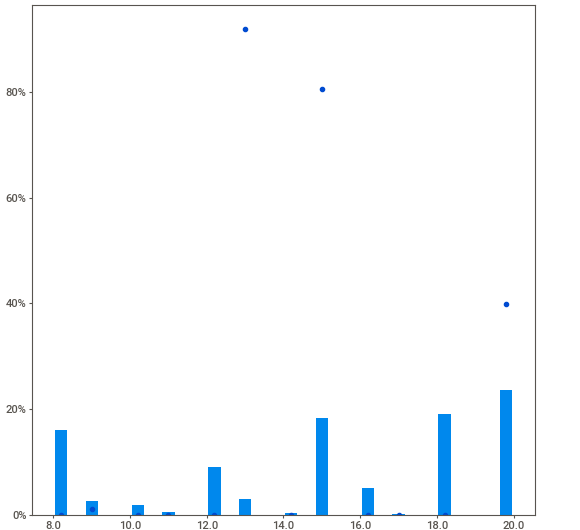
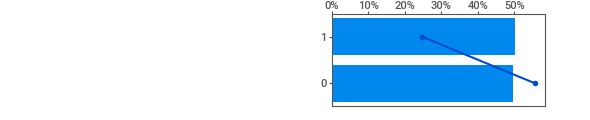
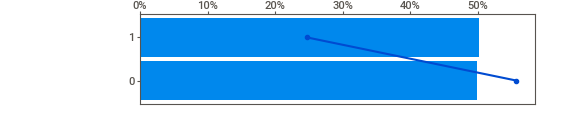
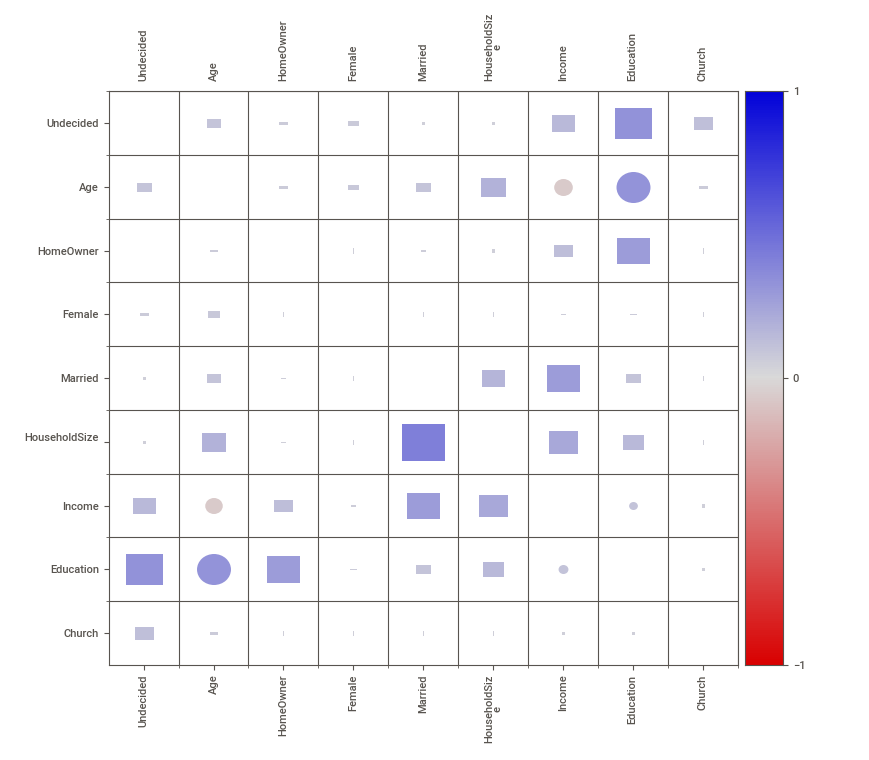
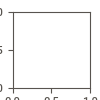

In [3]:
voters = pd.read_csv("BlueOrRed.csv")
voters.convert_dtypes().dtypes
display(voters.info())
# use sweetviz to analyze the data
sv.analyze(voters, target_feat="Undecided").show_notebook()

In [4]:
# Normalize the continuous variables using min-max normalization. You should
# obtain a new dataset that has your normalized continuous input variables,
# the categorical input variables (the categorical input variables are fine
# and don’t need to be normalized), and your output variable.\n
# Paste a screenshot of your code and output here showing the normalization
# and the first five rows of your new dataset. \n
numeric_cols = ["Age", "Income", "Education"]
voters_trasnformed = voters.copy()
voters_trasnformed[numeric_cols] = MinMaxScaler().fit_transform(voters[numeric_cols])
voters_trasnformed

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,4,0.306422,0.583333,0,1
1,0.444444,1,1,1,6,0.763303,0.583333,1,0
2,0.587302,1,0,1,6,0.234862,0.666667,0,1
3,0.507937,1,0,1,4,0.025688,0.000000,0,0
4,0.492063,1,1,1,2,0.113761,0.583333,1,1
...,...,...,...,...,...,...,...,...,...
9995,0.587302,1,1,1,2,0.060550,0.833333,0,1
9996,0.174603,1,1,0,5,0.176147,0.583333,1,1
9997,0.650794,0,1,0,1,0.056881,1.000000,0,1
9998,0.761905,0,0,1,3,0.000000,0.000000,1,0


In [5]:
# Use the train_test_split() function in the sklearn.model_selection module in scikit-learn to split the data into training and test sets. Your test set should be 30% of the entire data. Print the shape of the X_train, y_train, X_test and y_test data. You can use the default value of the random state in splitting the data, which is random_state=42.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    voters_trasnformed.drop(columns="Undecided"),
    voters_trasnformed["Undecided"],
    test_size=0.3,
)

for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

print(y_train.value_counts())
print(y_test.value_counts())

(7000, 8)
(3000, 8)
(7000,)
(3000,)
0    4226
1    2774
Name: Undecided, dtype: int64
0    1760
1    1240
Name: Undecided, dtype: int64


In [6]:
# Construct a decision tree and fit the tree into the data. Then use your decision tree model to make predictions on the training set as well as on the test set. Assign your results to y_train_pred and y_test_pred respectively. Print out the first 100 predictions for each of the  y_train_pred and y_test_pred. \nPaste a screenshot of your code and output here\n

from sklearn.tree import DecisionTreeClassifier

decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)
y_train_pred = decision_tree_clf.predict(X_train)
y_test_pred = decision_tree_clf.predict(X_test)

print("Training Predictions", y_train_pred[:100])
print("Test Predictions", y_test_pred[:100])

Training Predictions [0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1]
Test Predictions [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0
 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0]


In [7]:
# Find the overall accuracy of the tree model on the training set and on the test set. Use the accuracy_score() function in the sklearn.metrics module. Does the tree overfit the model? Why or why not?
from sklearn.metrics import accuracy_score

print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.9998571428571429
Test Accuracy:  0.965


In [8]:
# Also, use the .score() method of the tree estimator to find the overall accuracy on the training set and test set.
print("Training Accuracy (score):", decision_tree_clf.score(X_train, y_train))
print("Testing Accuracy (score):", decision_tree_clf.score(X_test, y_test))

Training Accuracy (score): 0.9998571428571429
Testing Accuracy (score): 0.965


In [9]:
# Use the zero_one_loss() function inside the sklearn.metric module to compute the overall prediction error of the tree model on the test set and training set.
from sklearn.metrics import zero_one_loss

print("Training Error: ", zero_one_loss(y_train, y_train_pred))
print("Test Error: ", zero_one_loss(y_test, y_test_pred))

Training Error:  0.00014285714285711126
Test Error:  0.03500000000000003


In [10]:
# Do other assessment of your model using the following tools in sklearn.metrics module
# Generate the classification report using the classification_report()
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1760
           1       0.96      0.96      0.96      1240

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [11]:
# Generate the confusion matrix using confusion_matrix()
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_pred))

[[1710   50]
 [  55 1185]]


In [12]:
# Generate the precision score using precision_score()
from sklearn.metrics import precision_score

print("Precision score: ", precision_score(y_test, y_test_pred))



Precision score:  0.9595141700404858


In [13]:
# Generate the recall score using recall_score()
from sklearn.metrics import recall_score

print("Recall score: ", recall_score(y_test, y_test_pred))


Recall score:  0.9556451612903226


In [14]:
# Generate the f1 score using f1_score()
from sklearn.metrics import f1_score

print("F1 score: ", f1_score(y_test, y_test_pred))

F1 score:  0.9575757575757576


/Users/raja_/Documents/GitHub/msds_winter_2022/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/raja_/Documents/GitHub/msds_winter_2022/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


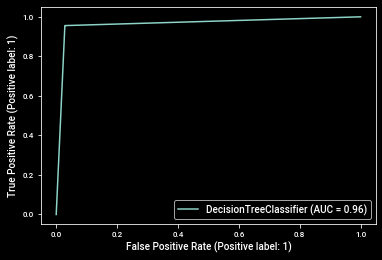

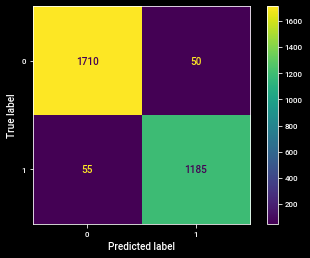

In [15]:
# Generate a roc curve using plot_roc_curve()
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

plot_roc_curve(decision_tree_clf, X_test, y_test)
# Plot the confusion matrix using plot_confusion_matrix
plot_confusion_matrix(decision_tree_clf, X_test, y_test)

In [16]:
# Question 3
# You will now use cross validation to find better accuracy scores as well as to tune your hyperparameters. The hyperparameters of a decision tree as shown below. We are more interested in optimizing the depth of the tree (max_depth).

# First retrieve the maximum depth of this decision tree. Use clf.tree_.max_depth where clf is the name of your estimator and tree is the module in sklearn.
print("Max depth:", decision_tree_clf.tree_.max_depth)

Max depth: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

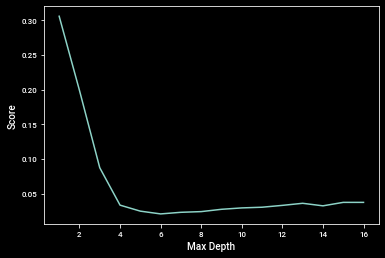

<IPython.core.display.Javascript object>

Optimal max depth: 6


In [17]:
# You will find the optimal depth of the tree by tuning the max_depth hyperparameter. Write a for loop to iteratively compute the overall error rate of the model on the test set only for the possible values of the maximum depth of the tree. Here are ideas for your code (See class notes on Modeling in Scikit-learn for more ideas):

# You will need to initialize a variable outside the loop to track the error rates for each maximum depth value.
depth_vs_error = []

for i in range(1, decision_tree_clf.tree_.max_depth + 1):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    error = zero_one_loss(y_test, clf.predict(X_test))
    depth_vs_error.append([i, error])

# Then plot the overall error rate on the y-axis and the maximum depth of the tree on the x-axis. Also use np.argmin() on the error rates you obtained to retrieve the optimal maximum depth of the tree with the least error rate. Does this value match with what you see on your plot?
plt.plot([i[0] for i in depth_vs_error], [i[1] for i in depth_vs_error])
plt.ylabel("Score")
plt.xlabel("Max Depth")
plt.show()

print("Optimal max depth:", np.argmin([i[1] for i in depth_vs_error]) + 1)

In [18]:
# Now, you will still find the optimal maximum depth of the decision tree model using grid search cross validation. Additionally, you will be simultaneously optimizing the max_features hyperparameter as well. You can check the documentation to see what these hyperparameters represent. You will use the GridSearchCV() constructor inside the sklearn.model_selection module. Make sure to pass the arguments (estimator and param_grid into the GridSearchCV() constructor. Set the parameter cv=8. Do you have the same optimal maximum depth as you got in the question above?  (See class notes on Modeling in Scikit-learn for more ideas). You can use these parameter grid as one of the arguments:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": range(1, 20), "max_features": [0.2, 0.4, 0.6, 0.8]}

grid = GridSearchCV(estimator=decision_tree_clf, param_grid=param_grid, cv=8, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=0.8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

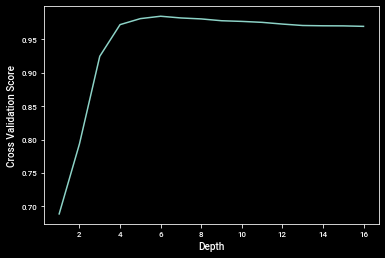

<IPython.core.display.Javascript object>

Optimal max depth: 6


In [19]:
# You will tune the maximum depth hyperparameter again using cross validation but this time, you will use the cross_val_score() function inside the sklearn.model_selection module. You will use this cross_val_score() function in combination with a for loop to find the optimal maximum depth of the tree. Here is a code snippet idea:

# Track the error rate for each depth and plot the error rates versus the corresponding maximum depths of the tree. Also use the np.argmin() on the error rates to retrieve the optimal maximum depth , corresponding to the lowest error rate. Does the retrieved optimal maximum depth look like what you see on your plot? ?  (See class notes on Modeling in Scikit-learn for more ideas).
from sklearn.model_selection import cross_val_score

depth_vs_cross_val_score = []
for i in range(1, decision_tree_clf.tree_.max_depth + 1):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=8)
    depth_vs_cross_val_score.append([i, scores.mean()])

plt.plot(
    [i[0] for i in depth_vs_cross_val_score], [i[1] for i in depth_vs_cross_val_score]
)
plt.ylabel("Cross Validation Score")
plt.xlabel("Depth")
plt.show()

print("Optimal max depth:", np.argmax([i[1] for i in depth_vs_cross_val_score]) + 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

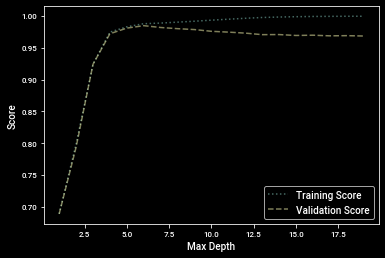

<IPython.core.display.Javascript object>

Optimal max depth: 5


In [20]:
# You will use another approach to plot the error rates versus the maximum depth of the tree. Here, you would use the validation_curve() function inside the sklearn.model_selection module. This function implements cross validation and returns the training accuracy scores and test (validation) accuracy scores for each iteration in the k-fold cross validation, for each of the hyperparameter values. You will need to aggregate the scores using np.mean(axis=1) to get the average of the accuracy scores for all iterations, for each hyperparameter value. Use these average accuracy scores to obtain corresponding error rates for the training and test (validation) sets. Then plot the error rates on the training set versus the maximum depth values. Also plot on the same figure, the error rates of the test (or validation) set versus the maximum depth values. What is the optimal maximum depth? (See class notes on Modeling in Scikit-learn for more ideas).
from sklearn.model_selection import validation_curve

train_scores, validation_scores = validation_curve(
    decision_tree_clf,
    X_train,
    y_train,
    param_name="max_depth",
    param_range=range(1, 20),
    cv=8,
)
train_scores, validation_scores = np.mean(train_scores, axis=1), np.mean(
    validation_scores, axis=1
)

plt.plot(range(1, 20), train_scores, label="Training Score", linestyle=":", alpha=0.5)
plt.plot(
    range(1, 20), validation_scores, label="Validation Score", linestyle="--", alpha=0.5
)
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

print("Optimal max depth:", np.argmax(validation_scores))

In [26]:
from sklearn.datasets import load_digits

# Data pre-processing (to the extent deemed necessary)
X, y = load_digits(return_X_y=True)

# Data splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model construction (a decision tree and a random forest)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)

(1797, 64)


RandomForestClassifier(max_depth=2, random_state=0)

In [22]:
# GridSearch
decision_tree_grid = GridSearchCV(estimator=clf, param_grid={"max_depth":range(1, 30)}, cv=8, n_jobs=-1)
decision_tree_grid.fit(X_train, y_train)

random_forest_grid = GridSearchCV(estimator=clf_rf, param_grid={"max_depth":range(1, 30)}, cv=8, n_jobs=-1)
random_forest_grid.fit(X_train, y_train)


GridSearchCV(cv=8,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             n_jobs=-1, param_grid={'max_depth': range(1, 30)})

In [23]:
print("Training score:", decision_tree_grid.score(X_train, y_train))
print("Testing score:", decision_tree_grid.score(X_test, y_test))

Training score: 1.0
Testing score: 0.8611111111111112


In [24]:
print("Training Score: ", random_forest_grid.score(X_train, y_train))
print("Testing Score: ", random_forest_grid.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.9833333333333333
